# Matrix and vectors

In [1]:
import numpy as np
import torch

In [2]:
nv = np.array([[1,2,3,4]])
print(nv)
nvt = nv.T
print(nvt)

[[1 2 3 4]]
[[1]
 [2]
 [3]
 [4]]


In [3]:
type(nv)

numpy.ndarray

In [4]:
t = torch.tensor([[1,2,3,4]])
print(t)
print(t.T)

tensor([[1, 2, 3, 4]])
tensor([[1],
        [2],
        [3],
        [4]])


In [5]:
type(t)

torch.Tensor

In [6]:
nv1 = np.array([1,2,3,4])
nv2 = np.array([0,1,0,-1])
print(np.dot(nv1, nv2))

-2


In [7]:
t1 = torch.tensor([1,2,3,4])
t2 = torch.tensor([0,1,0,-1])
print(torch.dot(t1, t2))

tensor(-2)


In [8]:
A = np.random.randn(4,5)
B = np.random.randn(5,3)
print(np.matmul(A,B))

[[-3.41865565 -1.5544631  -1.76010918]
 [-1.25172218  0.20124688  1.41998353]
 [-0.80858003 -2.82209042  0.03149728]
 [-1.73738644  0.02220456 -0.10433517]]


In [12]:
At = torch.randn(4,5)
Bt = torch.randn(5,2)
print(torch.matmul(At, Bt))

tensor([[-2.3060, -6.0958],
        [ 1.6976,  1.3460],
        [ 6.5738, -2.9937],
        [-5.9273, -1.1933]])


In [13]:
print(At)
print(Bt)

tensor([[-2.2162,  0.7493, -0.8520,  0.5663,  0.3740],
        [ 0.6146,  0.1972,  1.6948, -0.1656, -0.5330],
        [-0.8460, -1.1618,  1.1413,  2.0500,  0.0859],
        [-0.3408,  0.2695, -0.1587, -1.3536,  1.6538]])
tensor([[ 1.3958,  2.6231],
        [-0.3459, -0.2464],
        [ 0.6839, -0.2996],
        [ 3.2282, -0.3321],
        [-0.5322, -0.4415]])


In [14]:
print(At@Bt)

tensor([[-2.3060, -6.0958],
        [ 1.6976,  1.3460],
        [ 6.5738, -2.9937],
        [-5.9273, -1.1933]])


In [15]:
#  Some numpy types work well with torch type but not all
print(At@B)

tensor([[-0.4429,  3.6405,  2.0325],
        [ 4.0054, -1.6126, -0.0259],
        [ 4.8285,  1.1517,  2.9203],
        [-4.1711,  0.9305, -2.8034]], dtype=torch.float64)


In [16]:
print(At@torch.tensor(B, dtype=torch.float))

tensor([[-0.4429,  3.6405,  2.0325],
        [ 4.0054, -1.6126, -0.0259],
        [ 4.8285,  1.1517,  2.9203],
        [-4.1711,  0.9305, -2.8034]])


# Softmax

In [17]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

- The sum of all the softmax transformation is equal to 1
- As the number of data points increases the transformation values becomes lower
- Softmax is a strictly positive function
- It never becomes zero
- In log space the transformations are linear but in linear scale the transformations are exponential

In [18]:
# z = [1,2,3]
z = np.random.randint(-5, 15, 25)
exp = np.exp(z)
sum = np.sum(exp)
softmax = np.divide(exp, sum)

print(softmax)
print(np.sum(softmax))

[6.97899537e-09 2.56742892e-09 7.65339773e-06 3.08760101e-03
 6.97899537e-09 4.17861358e-04 2.56742892e-09 2.28144571e-02
 2.56742892e-09 1.68577303e-01 3.81040236e-07 4.58240620e-01
 1.53722603e-04 1.89708763e-08 1.13586494e-03 1.40176869e-07
 1.68577303e-01 7.65339773e-06 7.65339773e-06 1.68577303e-01
 8.39296973e-03 5.15681883e-08 3.81040236e-07 1.03577475e-06
 2.56742892e-09]
1.0


In [19]:
softfunc = nn.Softmax(dim=0)
softmax = softfunc(torch.Tensor(z))
print(softmax)

tensor([6.9790e-09, 2.5674e-09, 7.6534e-06, 3.0876e-03, 6.9790e-09, 4.1786e-04,
        2.5674e-09, 2.2814e-02, 2.5674e-09, 1.6858e-01, 3.8104e-07, 4.5824e-01,
        1.5372e-04, 1.8971e-08, 1.1359e-03, 1.4018e-07, 1.6858e-01, 7.6534e-06,
        7.6534e-06, 1.6858e-01, 8.3930e-03, 5.1568e-08, 3.8104e-07, 1.0358e-06,
        2.5674e-09])


In [20]:
type(softmax)

torch.Tensor

# Logarithms

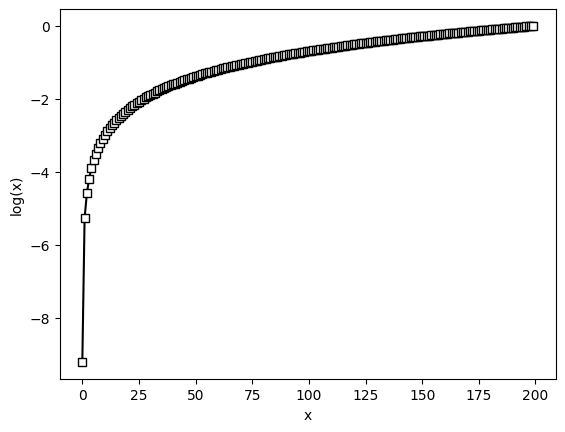

In [21]:
x = np.linspace(.0001,1,200)
logx = np.log(x)

plt.plot(logx, 'ks-', markerfacecolor='w')
plt.xlabel('x')
plt.ylabel('log(x)')
plt.show()

# Entropy and cross-entropy

In [22]:
# Entropy
p = 0.25

# Binary cross entropy, really important loss function
H = -np.sum(p * np.log(p) + (1-p)*np.log(1-p))

print(H)

0.5623351446188083


In [23]:
# Cross entropy
p = [1, 0]
q = [0.25, 0.75]

H = -np.sum(p * np.log(q))
print(H)

1.3862943611198906


In [24]:
import torch.nn.functional as F

p_tensor = torch.Tensor(p)
q_tensor = torch.Tensor(q)

# Inputs are interchanged here
F.binary_cross_entropy(q_tensor,p_tensor)

tensor(1.3863)

# Max/min and argmax/min

In [25]:
v = np.array([1,40,2,-3])
np.argmin(v)

3

In [26]:
M = np.array([
    [0,-1,10],
    [20,8,-6]
])

print(np.min(M))
print(np.min(M, axis=0))
print(np.min(M, axis=1))


-6
[ 0 -1 -6]
[-1 -6]


In [27]:
print(np.argmin(M))
print(np.argmin(M, axis=0))
print(np.argmin(M, axis=1))

5
[0 0 1]
[1 2]


In [28]:
v_torch = torch.Tensor(v)
print(v_torch)
print(torch.argmax(v_torch))

tensor([ 1., 40.,  2., -3.])
tensor(1)


In [29]:
M_torch = torch.Tensor(M)
print(M_torch)
print(torch.argmax(M_torch))
print(torch.argmax(M_torch, axis=1))
print(torch.argmax(M_torch, axis=0))

tensor([[ 0., -1., 10.],
        [20.,  8., -6.]])
tensor(3)
tensor([2, 0])
tensor([1, 1, 0])


# Random seeds

In [30]:
np.random.seed(17)
print(np.random.randn(5))
# Random numbers will be the same

[ 0.27626589 -1.85462808  0.62390111  1.14531129  1.03719047]


In [31]:
rand1 = np.random.RandomState(29)
print(rand1.randn(5))

[-0.41748213  0.7060321   1.9159847  -2.1417555   0.71905689]


In [32]:
print(rand1.randn(5))

[ 0.46707262  0.76672253  0.88200945  0.80875066 -0.94716485]


In [33]:
print(torch.randn(5))

tensor([-0.8127, -0.9116,  0.3882, -1.1544, -0.0641])


In [34]:
torch.manual_seed(17)
print(torch.randn(5))

tensor([-1.4135,  0.2336,  0.0340,  0.3499, -0.0145])


# t-test

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

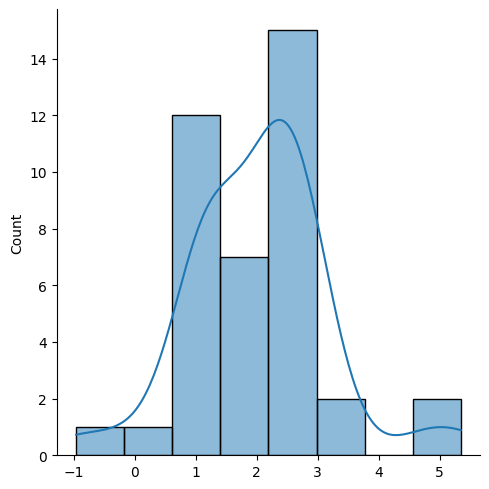

In [36]:
# Parameters

n1 =30
n2 = 40
mu1 = 1 
mu2 = 2

data1 = mu1 + np.random.randn(n1)
data2 = mu2 + np.random.randn(n2)

sns.displot(data2, kde=1)

In [37]:
# t-test

t,p = stats.ttest_ind(data1, data2)
print(t)
print(p)

-3.9191285791512436
0.00020894715183840786


- data2 is significantly different than the data1, because the p value is less than 0.05 (5%)